In [ ]:
""" Statistical Significance: Goal, Work Done, Future
(Read Diego's presentation before looking at this code)

Goal:
    The goal of this work was to discover if a t-test could be used to distingish if the machine roller 
    was worn out or not based on "old machine data." Tests could be run daily to see if data is far enough 
    away from the "old machine values" to continue production.

Work Done:
    In this block, I made a function to create a bar graph for each of the machine conditions that were run during
    Diego's experiment. Each graph has the mean and standard deviation for their specific trial. I did several
    failed t-tests and left only one for description at the end. I believe that I did not do the proper t-test
    for this data.

Future Work:
    I did a simple t-test, but I think that a Welch's t-test would be the proper test to do because of 
    unequal variance and data points. Using this would validate any results that were discovered and 
    future use on equipment would be possible. Data would need to be collected near the end of the machines
    life so that data from an old in-service machine could be compared to an old out-of-service machine could
    be made. This is perhaps the most important thing to do in order for this experiment to have a conclusion.


"""

In [2]:
#Statistical Significance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
#import scipy.fftpack

plt.rcParams["figure.figsize"] = (15,7.5)
plt.rcParams.update({'font.size': 20})
plt.rcParams["legend.fontsize"] = (15)

In [4]:
# read in the fft data
fft = pd.read_csv("data/diego-controlled-runs/grafana_data_export oct_fftcb.csv", sep = ';', header = 1, engine='python')
fft

,Series,Time,Value
0,CB FFT Band 0,2021-06-21T09:12:20+02:00,0.000160
1,CB FFT Band 0,2021-06-21T09:12:20+02:00,0.000186
2,CB FFT Band 0,2021-06-21T09:12:20+02:00,0.000144
3,CB FFT Band 0,2021-06-21T09:12:20+02:00,0.000226
4,CB FFT Band 0,2021-06-21T09:12:20+02:00,0.000157
...,...,...,...
230663,CB FFT Band 7,2021-06-21T17:13:00+02:00,0.000260
230664,CB FFT Band 7,2021-06-21T17:13:00+02:00,0.000209
230665,CB FFT Band 7,2021-06-21T17:13:00+02:00,0.000328
230666,CB FFT Band 7,2021-06-21T17:13:10+02:00,0.000328


In [5]:
# reduce the time variable
fft.Time.str[11:19]

# replace time variable with reduced string
fft['Time'] = fft.Time.str[11:19]

In [7]:
# separate data into bands
fft_band0 = fft.loc[fft["Series"] == "CB FFT Band 0"]
fft_band1 = fft.loc[fft["Series"] == "CB FFT Band 1"]
fft_band2 = fft.loc[fft["Series"] == "CB FFT Band 2"]
fft_band3 = fft.loc[fft["Series"] == "CB FFT Band 3"]
fft_band4 = fft.loc[fft["Series"] == "CB FFT Band 4"]
fft_band5 = fft.loc[fft["Series"] == "CB FFT Band 5"]
fft_band6 = fft.loc[fft["Series"] == "CB FFT Band 6"]
fft_band7 = fft.loc[fft["Series"] == "CB FFT Band 7"]

# resetting the indecies
fft_band0 = fft_band0.reset_index(drop=True)
fft_band1 = fft_band1.reset_index(drop=True)
fft_band2 = fft_band2.reset_index(drop=True)
fft_band3 = fft_band3.reset_index(drop=True)
fft_band4 = fft_band4.reset_index(drop=True)
fft_band5 = fft_band5.reset_index(drop=True)
fft_band6 = fft_band6.reset_index(drop=True)
fft_band7 = fft_band7.reset_index(drop=True)

In [1]:
# this code is meant to show the index where we should 
# the band into its proper trial run

# From the BYU Team:
    # we don't truly know how Diego used this code, we took it from his runs. It seems that only he knew 
    # exactly when the runs took place.

# print("Indexes for B1:",
# fft_band3.index[fft_band3['Time'] == '09:25:50'],
# fft_band3.index[fft_band3['Time'] == '09:30:50'])
# print("Indexes for B2:", 
# fft_band3.index[fft_band3['Time'] == '09:37:00'],
# fft_band3.index[fft_band3['Time'] == '09:41:40'])
# print("Indexes for B3:",
# fft_band3.index[fft_band3['Time'] == '09:56:00'],
# fft_band3.index[fft_band3['Time'] == '10:00:40'])
# print("Indexes for A1:",
# fft_band3.index[fft_band3['Time'] == '16:00:00'],
# fft_band3.index[fft_band3['Time'] == '16:02:00'])
# print("Indexes for A2:",
# fft_band3.index[fft_band3['Time'] == '16:10:00'],
# fft_band3.index[fft_band3['Time'] == '16:14:00'])
# print("Indexes for A3:",
# fft_band3.index[fft_band3['Time'] == '16:19:00'],
# fft_band3.index[fft_band3['Time'] == '16:22:10'])
# print("Indexes for A4:",
# fft_band3.index[fft_band3['Time'] == '16:24:20'],
# fft_band3.index[fft_band3['Time'] == '16:28:00'])
# print("Indexes for A5:",
# fft_band3.index[fft_band3['Time'] == '16:31:30'],
# fft_band3.index[fft_band3['Time'] == '16:36:50'])
# print("Indexes for A6:",
# fft_band3.index[fft_band3['Time'] == '16:45:20'],
# fft_band3.index[fft_band3['Time'] == '16:50:50'])
# print("Indexes for A7:",
# fft_band3.index[fft_band3['Time'] == '16:57:10'],
# fft_band3.index[fft_band3['Time'] == '17:00:00'])
# print("Indexes for A8:",
# fft_band3.index[fft_band3['Time'] == '17:00:00'],
# fft_band3.index[fft_band3['Time'] == '17:05:30'])

In [8]:
# Using the indeces from above to gather our trial data

#B1 Ads
b1_fft_band3 = fft_band3.iloc[1969:2720]
#B2
b2_fft_band3 = fft_band3.iloc[3693:4400]
#B3
b3_fft_band3 = fft_band3.iloc[6643:7403]


#A1 Ads
a1_fft_band3 = fft_band3.iloc[23325:23450]
#A2
a2_fft_band3 = fft_band3.iloc[24100:24595]
#A3
a3_fft_band3 = fft_band3.iloc[24850:25300]
#A4
a4_fft_band3 = fft_band3.iloc[25700:26260]
#A5
a5_fft_band3 = fft_band3.iloc[26570:26670]

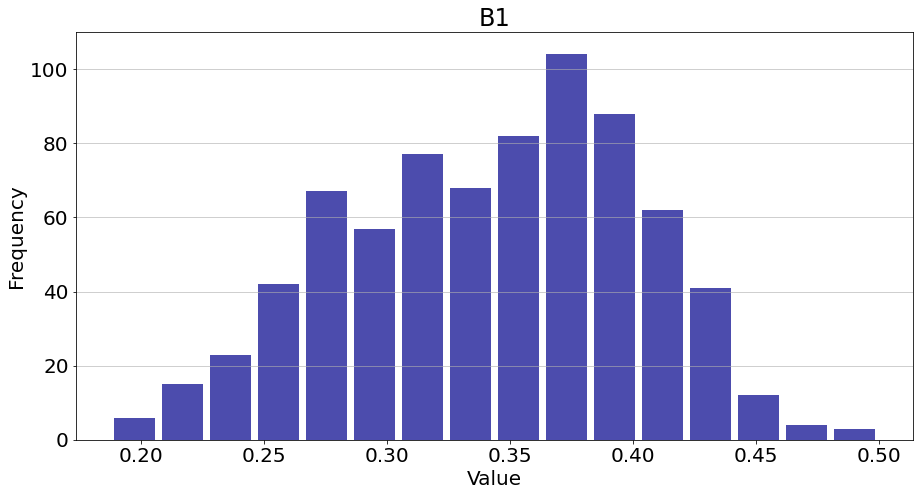

0.34196556324900135 0.05934780452151251 751


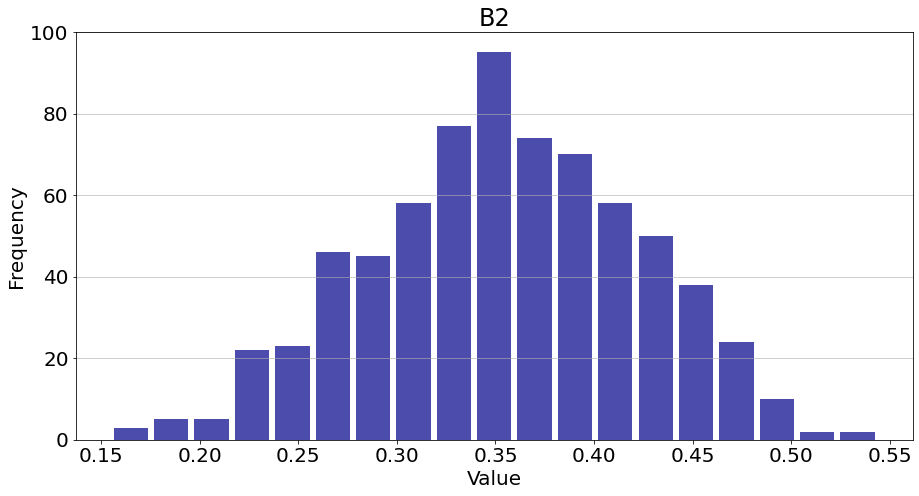

0.35422497171145684 0.06806543899654507 707


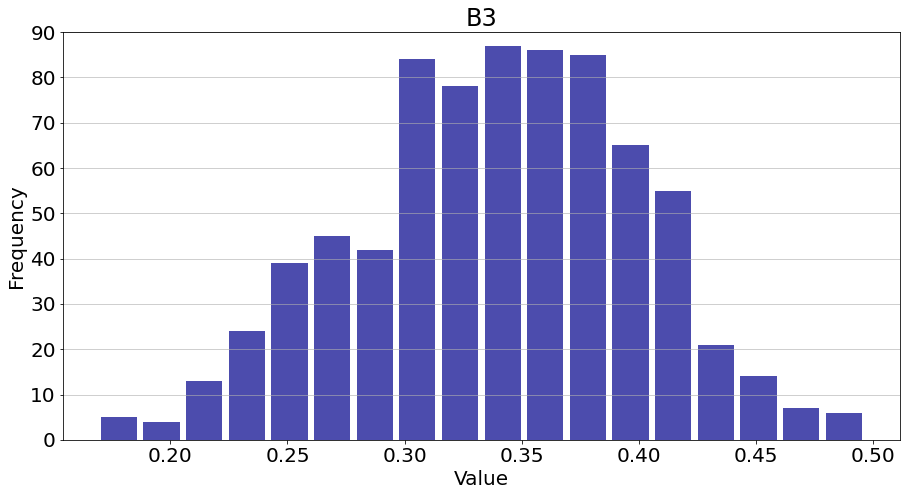

0.3395069118421053 0.05952922521109547 760


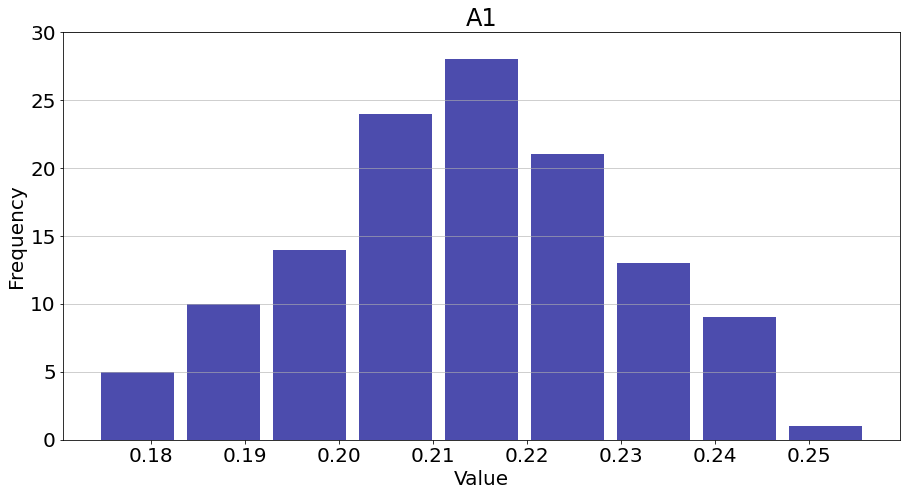

0.21338152800000004 0.016725897458237746 125


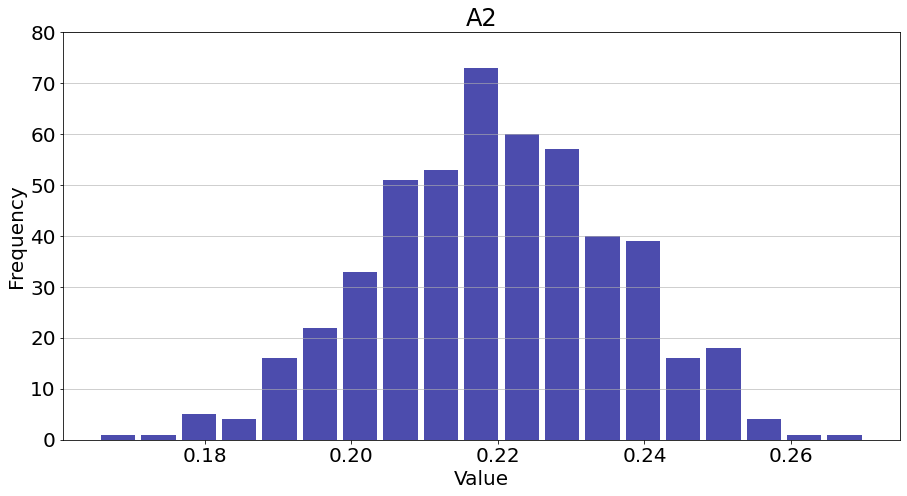

0.21980733737373737 0.016597080137128226 495


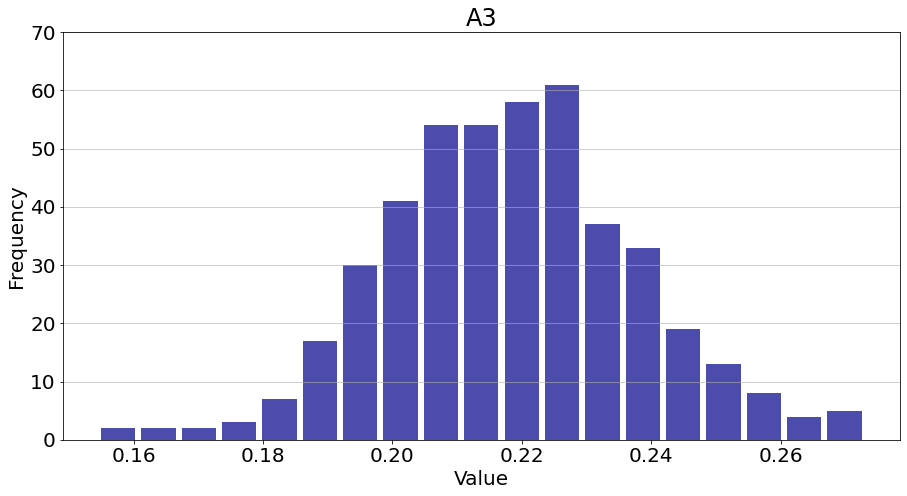

0.21839128444444444 0.01946327107820464 450


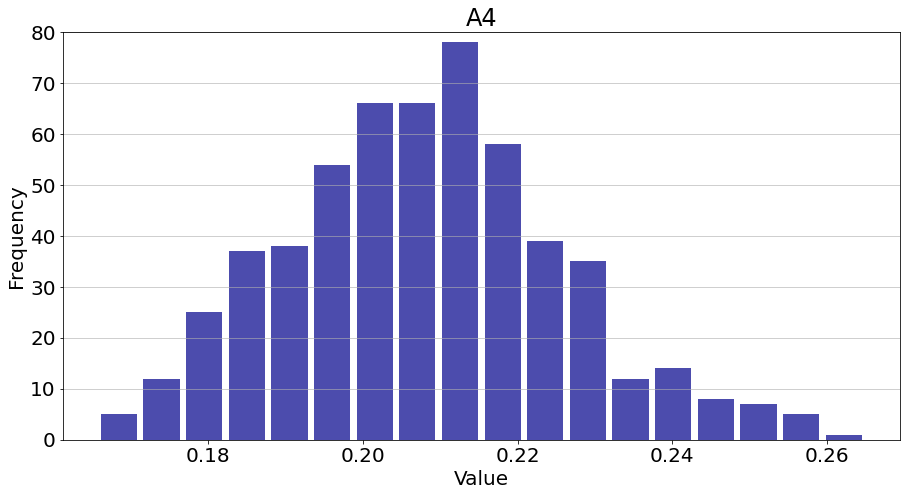

0.20806477499999998 0.017888859205788556 560


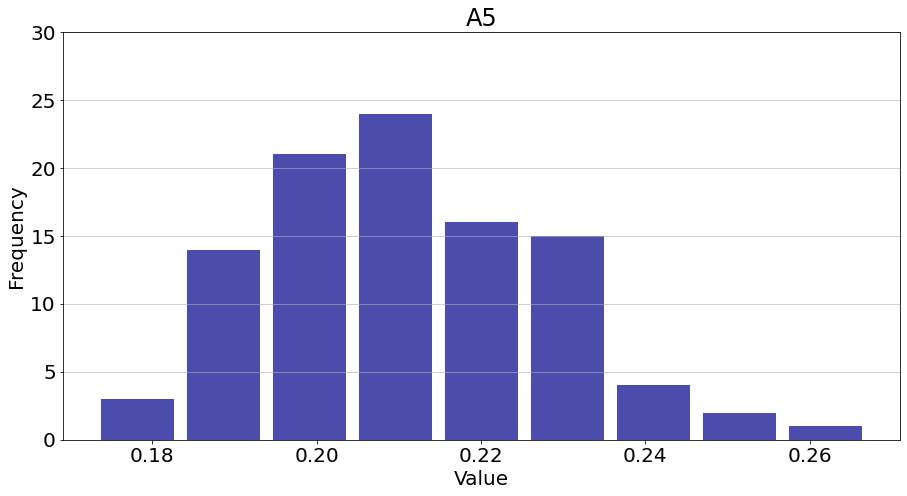

0.21108556 0.017612023336529642 100


In [9]:
# Creation graphs of all of the conditions of band 3

def bar_graphs(data, name):

    n, bins, patches = plt.hist(x= data['Value'], bins='auto', color='darkblue', alpha=0.7, rwidth=0.85)

    plt.grid(axis='y', alpha=0.75)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(name)

    maxfreq = n.max()

    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

    print(
    data['Value'].mean(),
    data['Value'].std(),
    data['Value'].count())

bar_graphs(b1_fft_band3, 'B1')
bar_graphs(b2_fft_band3, 'B2')
bar_graphs(b3_fft_band3, 'B3')
bar_graphs(a1_fft_band3, 'A1')
bar_graphs(a2_fft_band3, 'A2')
bar_graphs(a3_fft_band3, 'A3')
bar_graphs(a4_fft_band3, 'A4')
bar_graphs(a5_fft_band3, 'A5')



In [30]:
#A1 and A4 both target condition for old equipment. Statistically Significant Difference

    # They should be the same, but they are statistically different 
    # we can extrapolate and say that if these two are different, then how would we be able to tell if 
    # something is close enough to be taken out of service.

(0.208064774999999983 - 0.21338152800000004)/(0.017888859205788556 / np.sqrt(560))


-7.033279109236093

In [ ]:
"""
Instead of using bar graphs you can use a line graph by running:

#import seaborn as sns
#sns.kdeplot(vibration data)

These plots can overlap eachother and an easy visualization is created.

This visualization is cause for hope because visually 
    there is a striking difference between A trial and B trials.

I believe that future reasearch should be done with data that:
    1: Has the same conditions (pressure, stiffener kit, etc)
    2: Is closer to the end of equipment life 


"""

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='Value', ylabel='Density'>

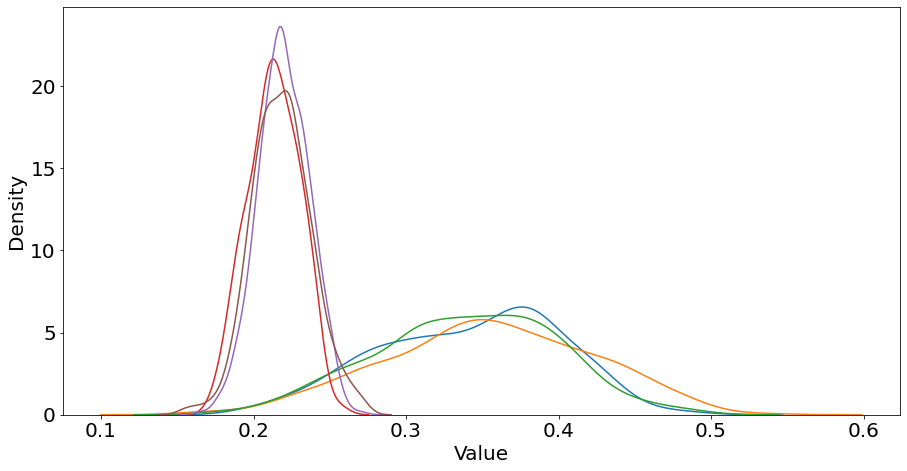

In [14]:
sns.kdeplot(b1_fft_band3["Value"])
sns.kdeplot(b2_fft_band3["Value"])
sns.kdeplot(b3_fft_band3["Value"])
sns.kdeplot(a1_fft_band3["Value"])
sns.kdeplot(a2_fft_band3["Value"])
sns.kdeplot(a3_fft_band3["Value"])